In [118]:
import numpy as np
import matplotlib.pyplot as plt

def chirp(f1,f2,len):
    sample_rate = 48000
    t = np.linspace(0,len/sample_rate,len)
    T = len/48000
    signal=np.sin(2*np.pi*((f2-f1)*(t*t/T) + f1*t))
    return signal

def correlate(sig,ref):
    res = []
    for i in range(len(sig)-len(ref)+1):
        res.append(np.dot(sig[i:i+len(ref)],ref))
    return res

def dot(sig,ref):
    sum=0
    for i in range(len(ref)):
        sum+=sig[i]*ref[i]
    return sum


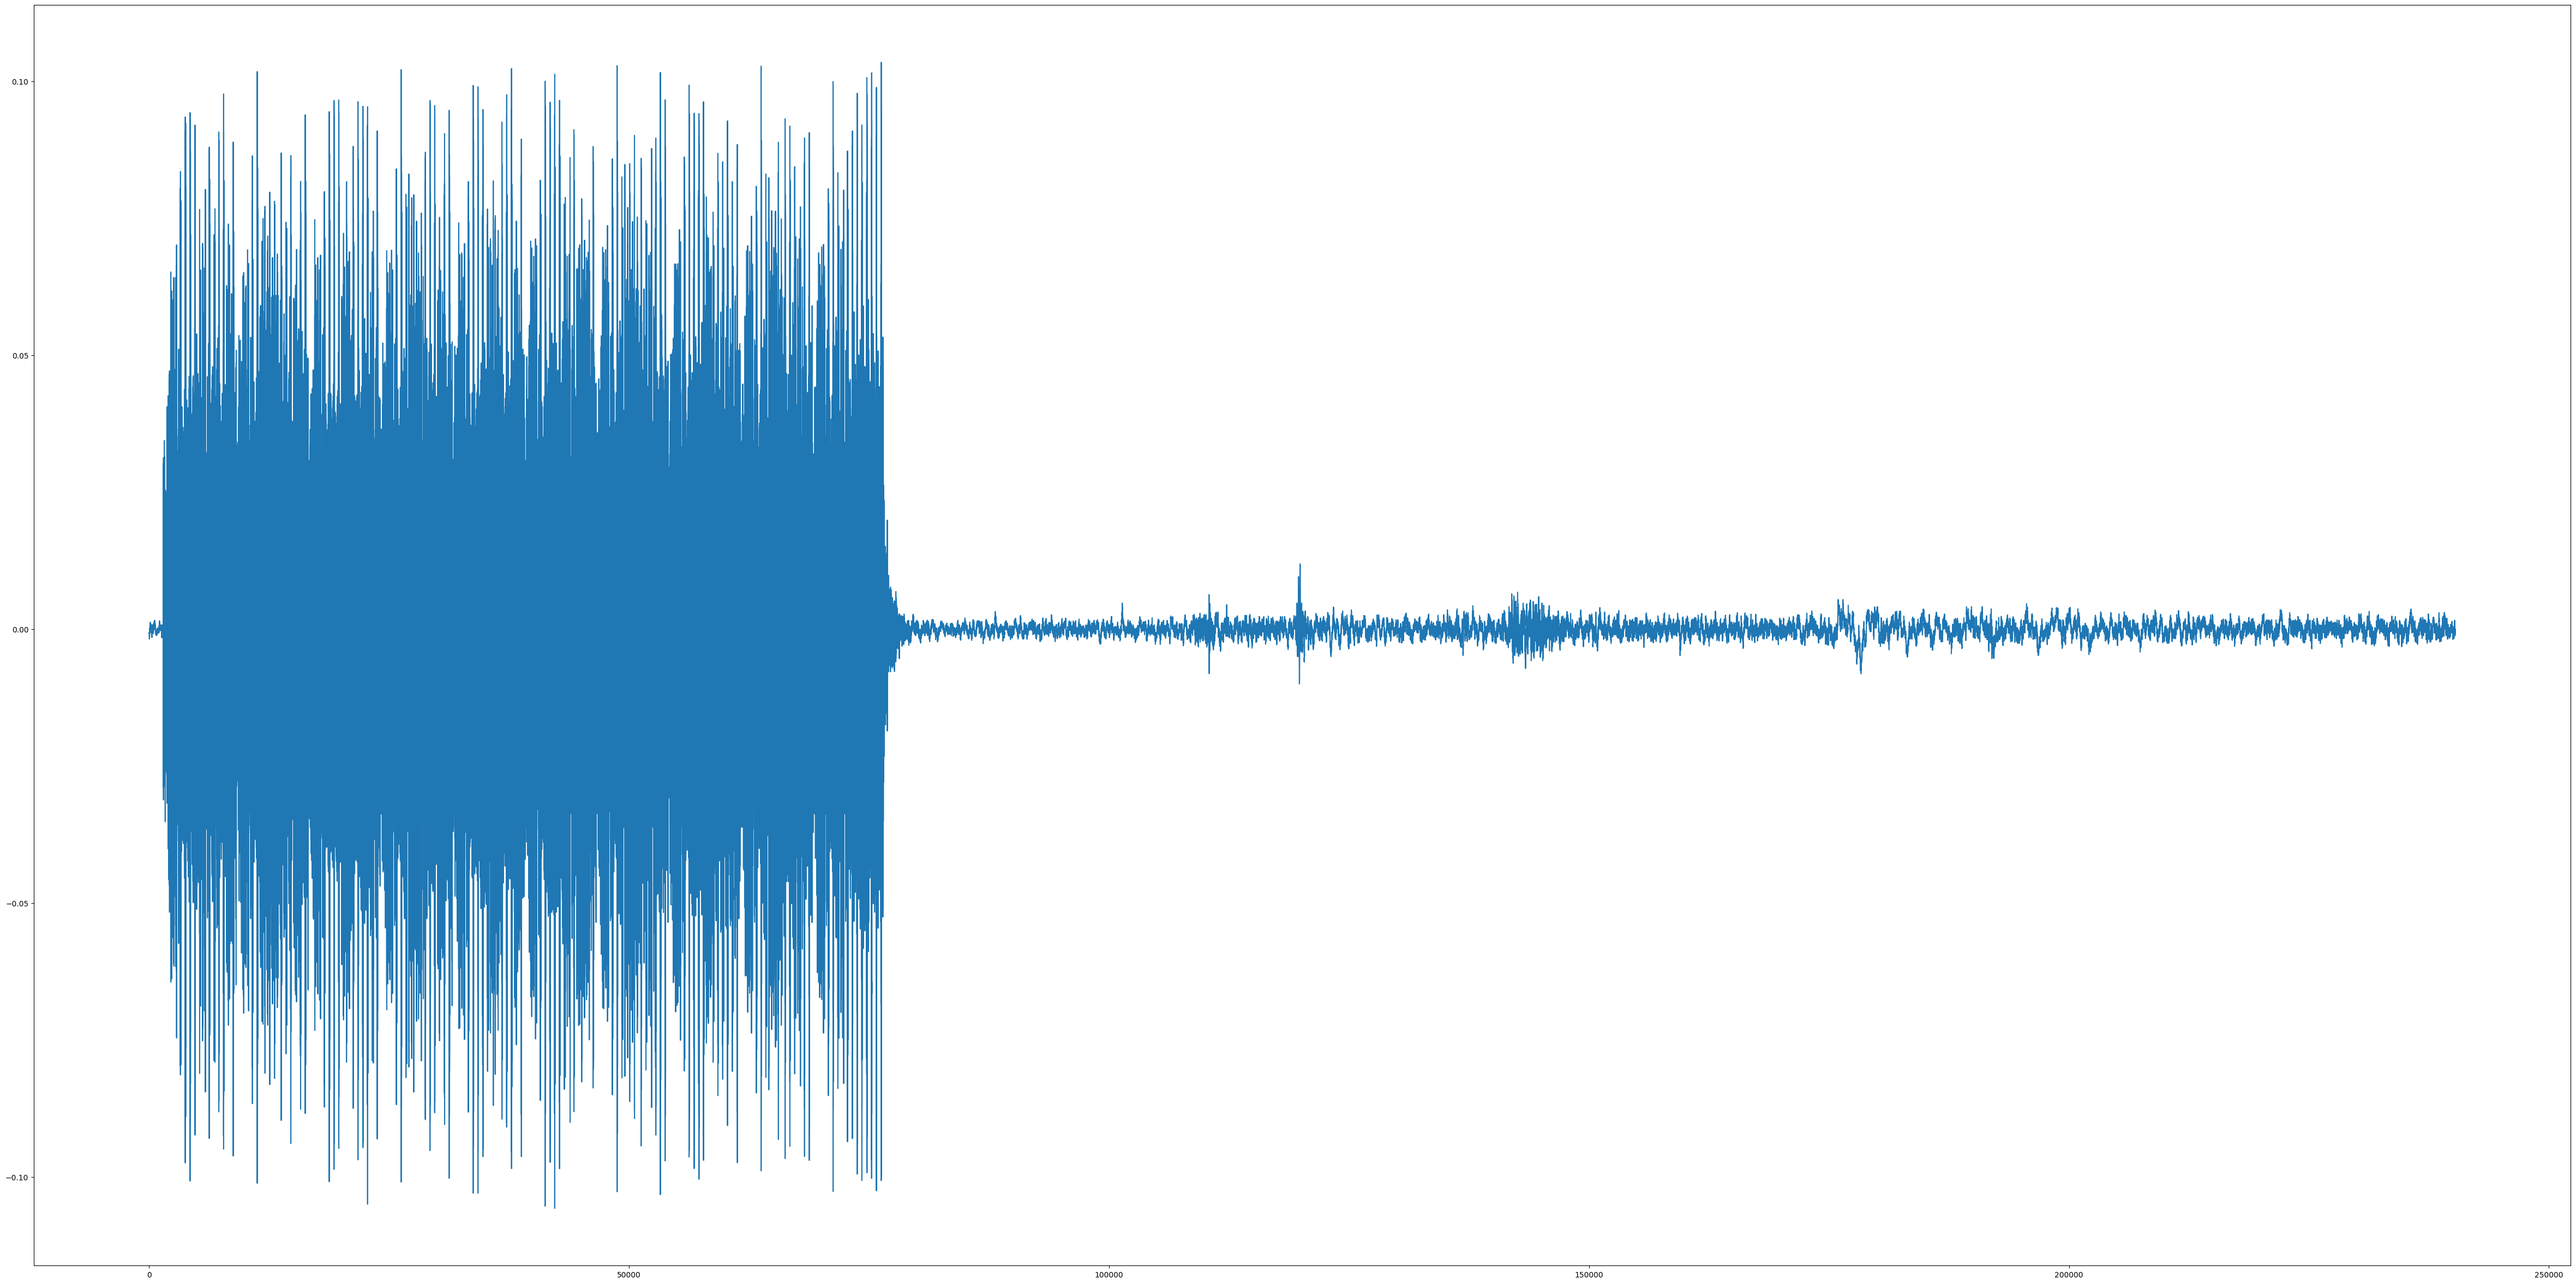

0.004260318481039745


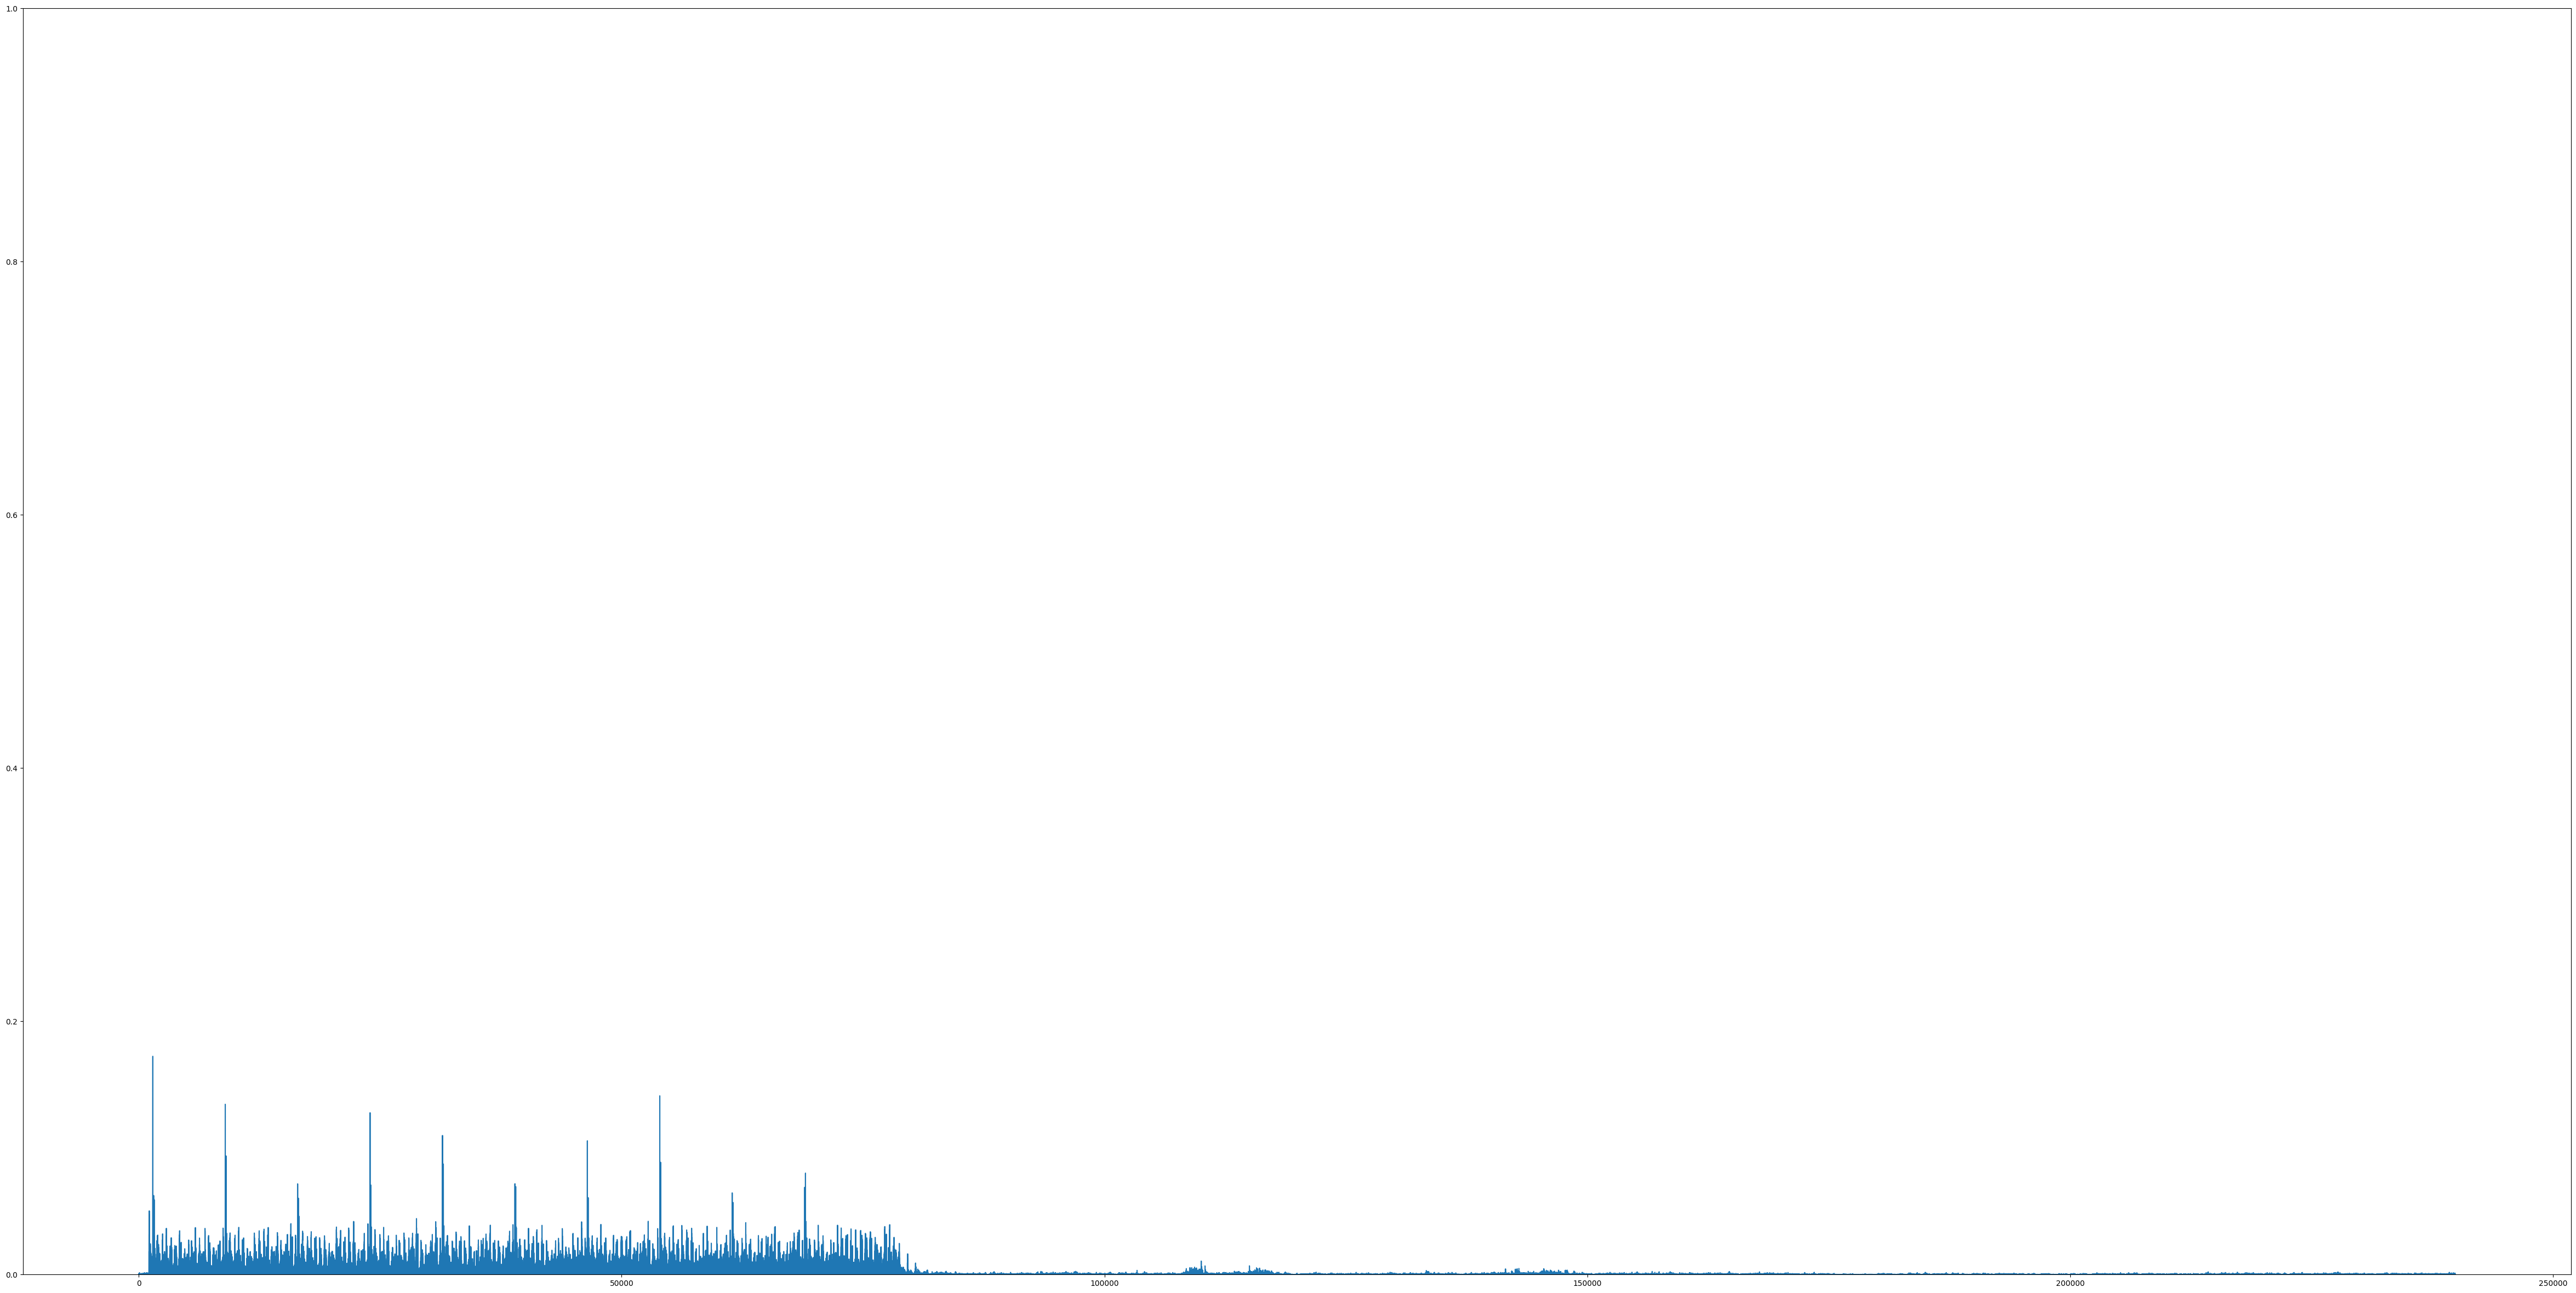

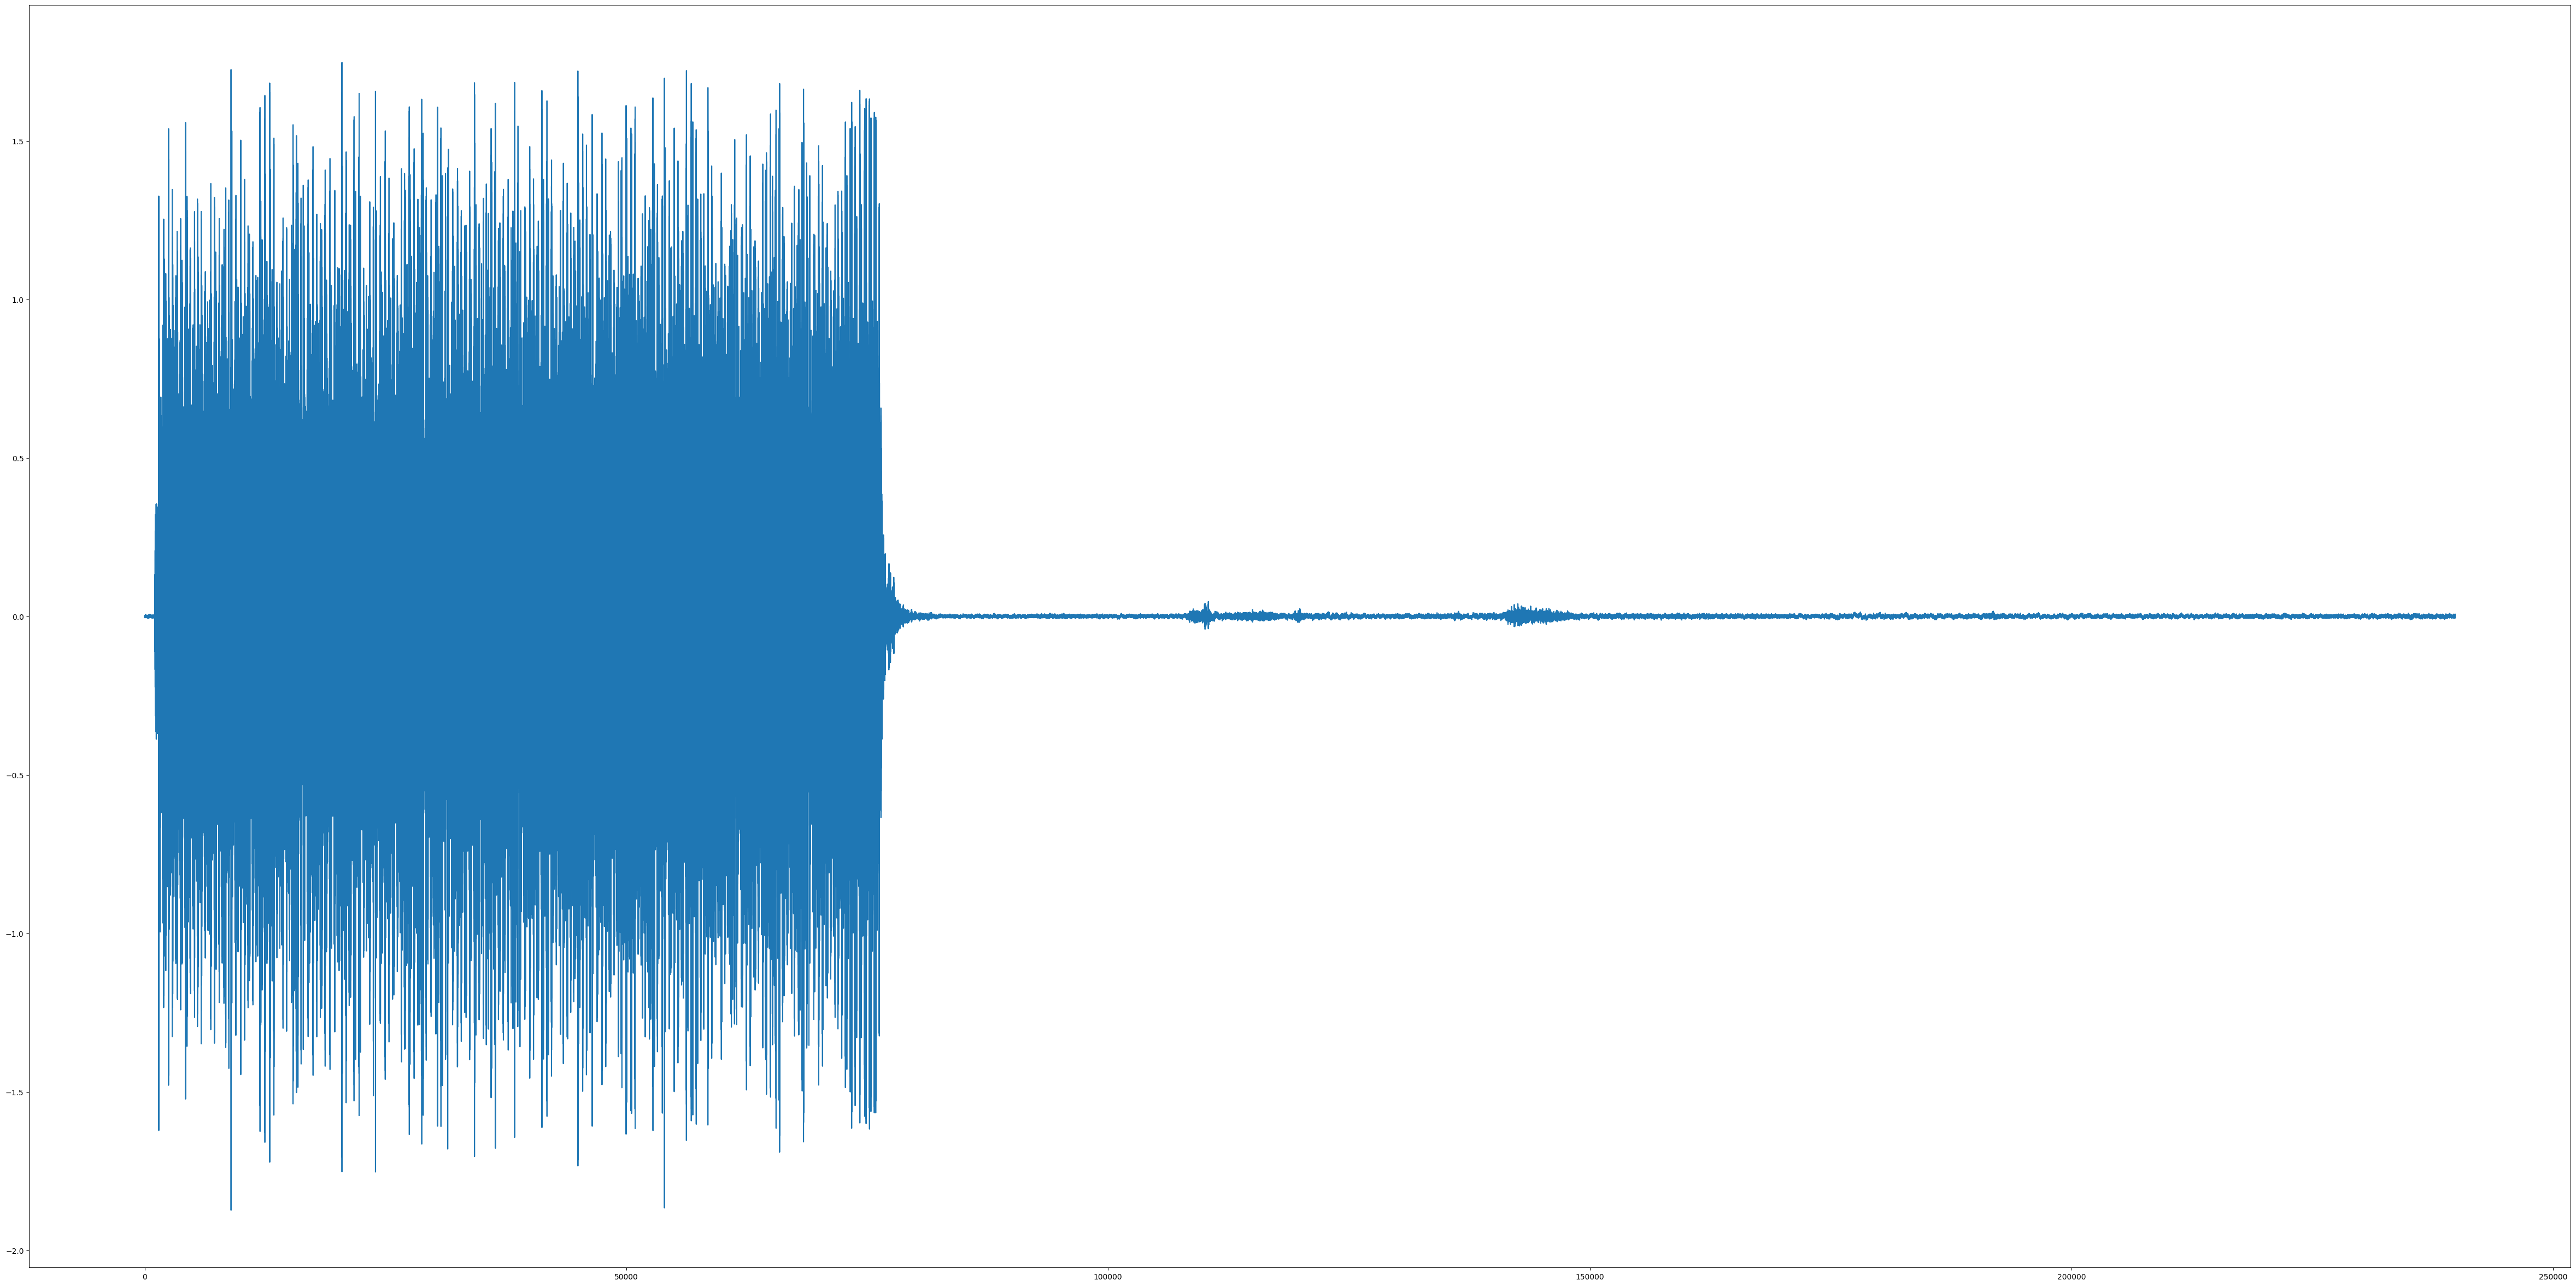

In [154]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

show_detail = 1
f = open("preamble.txt")
preamble = []
for line in f:
    for i in line.split(' '):
        if i != '':
            preamble.append(float(i))
f.close() 

preamble_len = len(preamble)

f = open("received.txt")
a = []
for line in f:
    for i in line.split(' '):
        if i != '':
            a.append(float(i))
f.close() 

mpl.rcParams['agg.path.chunksize'] = 10000

if show_detail:    
    plt.figure(figsize=(60,30))        
    plt.plot(a)    
    plt.show()

# if show_detail:    
#     plt.figure(figsize=(100,50))        
#     plt.plot(a[50000:51000])    
#     plt.show()

percent = []

points = []

max = 0
pos = 0

running_average = 0

max_avg = 0

val = []

for i in range(0,len(a)-preamble_len):
    res = np.dot(a[i:i+preamble_len],preamble)

    res_percent = res*res/(np.dot(preamble,preamble)*np.dot(a[i:i+preamble_len],a[i:i+preamble_len]))

    running_average += (res_percent-running_average)/(i+1)
    if running_average > max_avg:
        max_avg = running_average
    percent.append(res_percent)
    val.append(res)

    if((res_percent > running_average*3 and res_percent>0.1) and (res > max)):
        max = res
        pos = i
    if i > pos + 300 and max!=0:
        points.append(pos)
        max=0
        pos=0;
if show_detail:    
    print(max_avg)
    plt.figure(figsize=(60,30))        
    plt.plot(percent)
    plt.ylim(0,1)
    plt.show()
        
    plt.figure(figsize=(60,30))        
    plt.plot(val)
    plt.show()

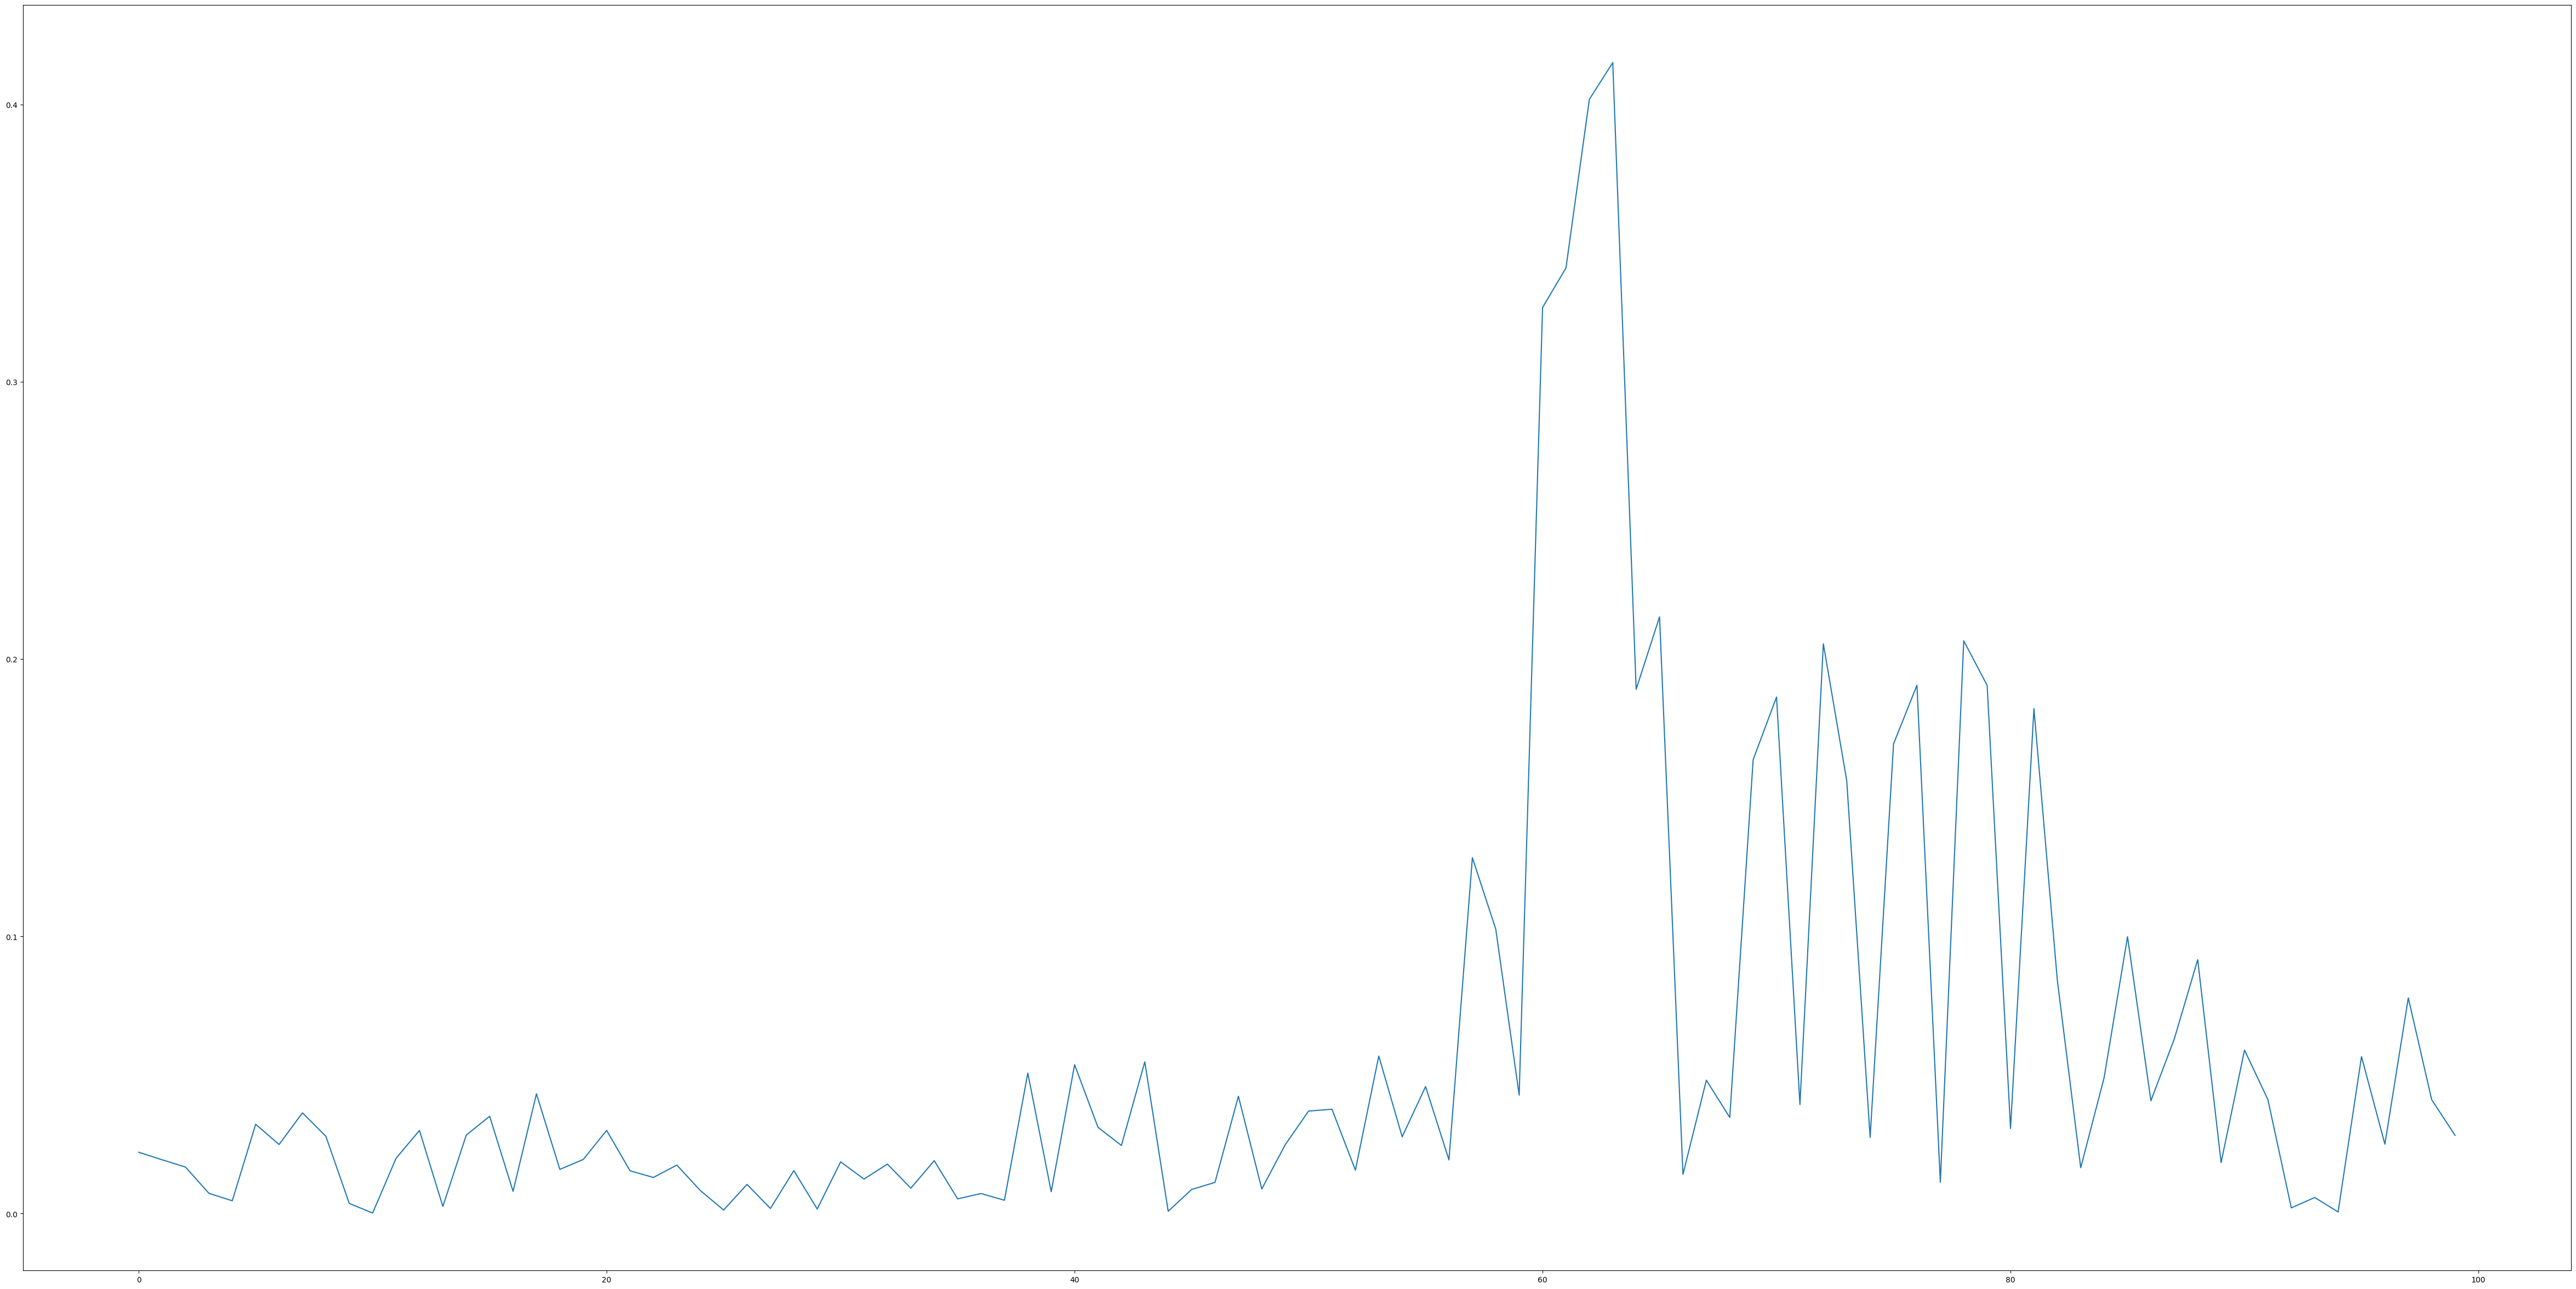

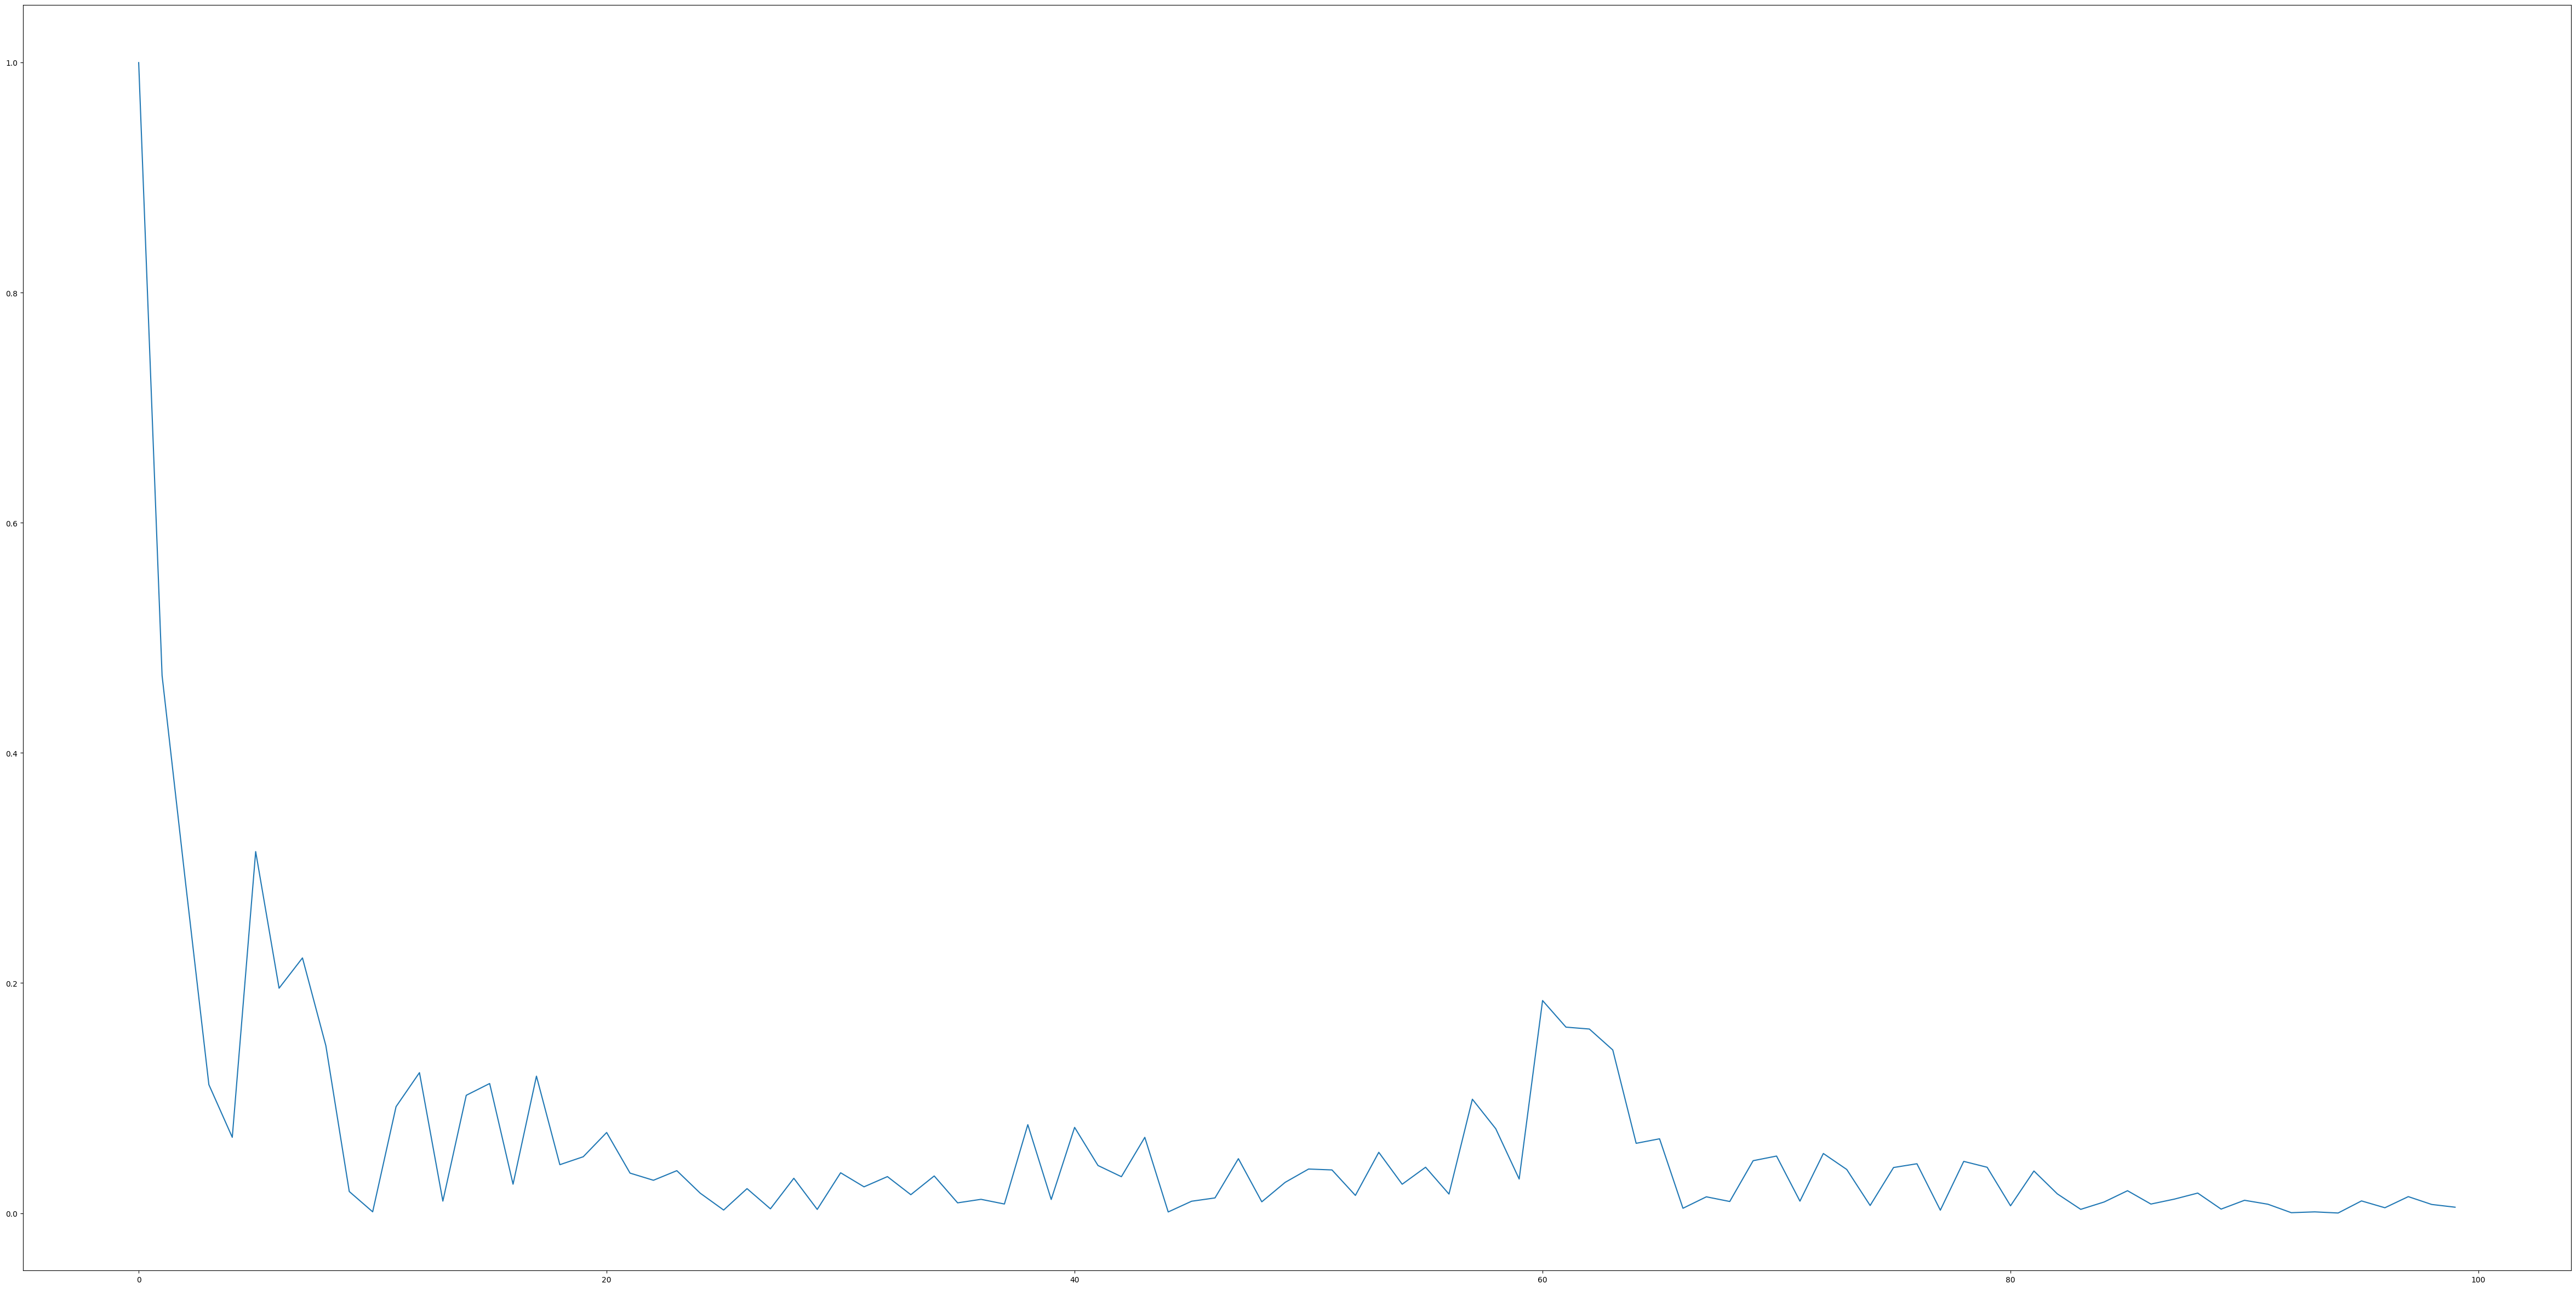

IndexError: list index out of range

In [178]:

first = percent[1400:1500].copy()

first = np.sqrt(first)

norm = []
sum = 0
k = 70
for i in range(0,len(first)):
    sum += first[i]
    if i>=k:
        sum-=first[i-k]
    norm.append(first[i]/sum)

plt.figure(figsize=(60,30))
plt.plot(first)
plt.show()

plt.figure(figsize=(60,30))
plt.plot(norm)
plt.show()

max_val = 0
max_pos = 0

for i in range(100,1000):
    if norm[i] > max_val:
        max_val=norm[i]
        max_pos = i
print(max_pos)

1861


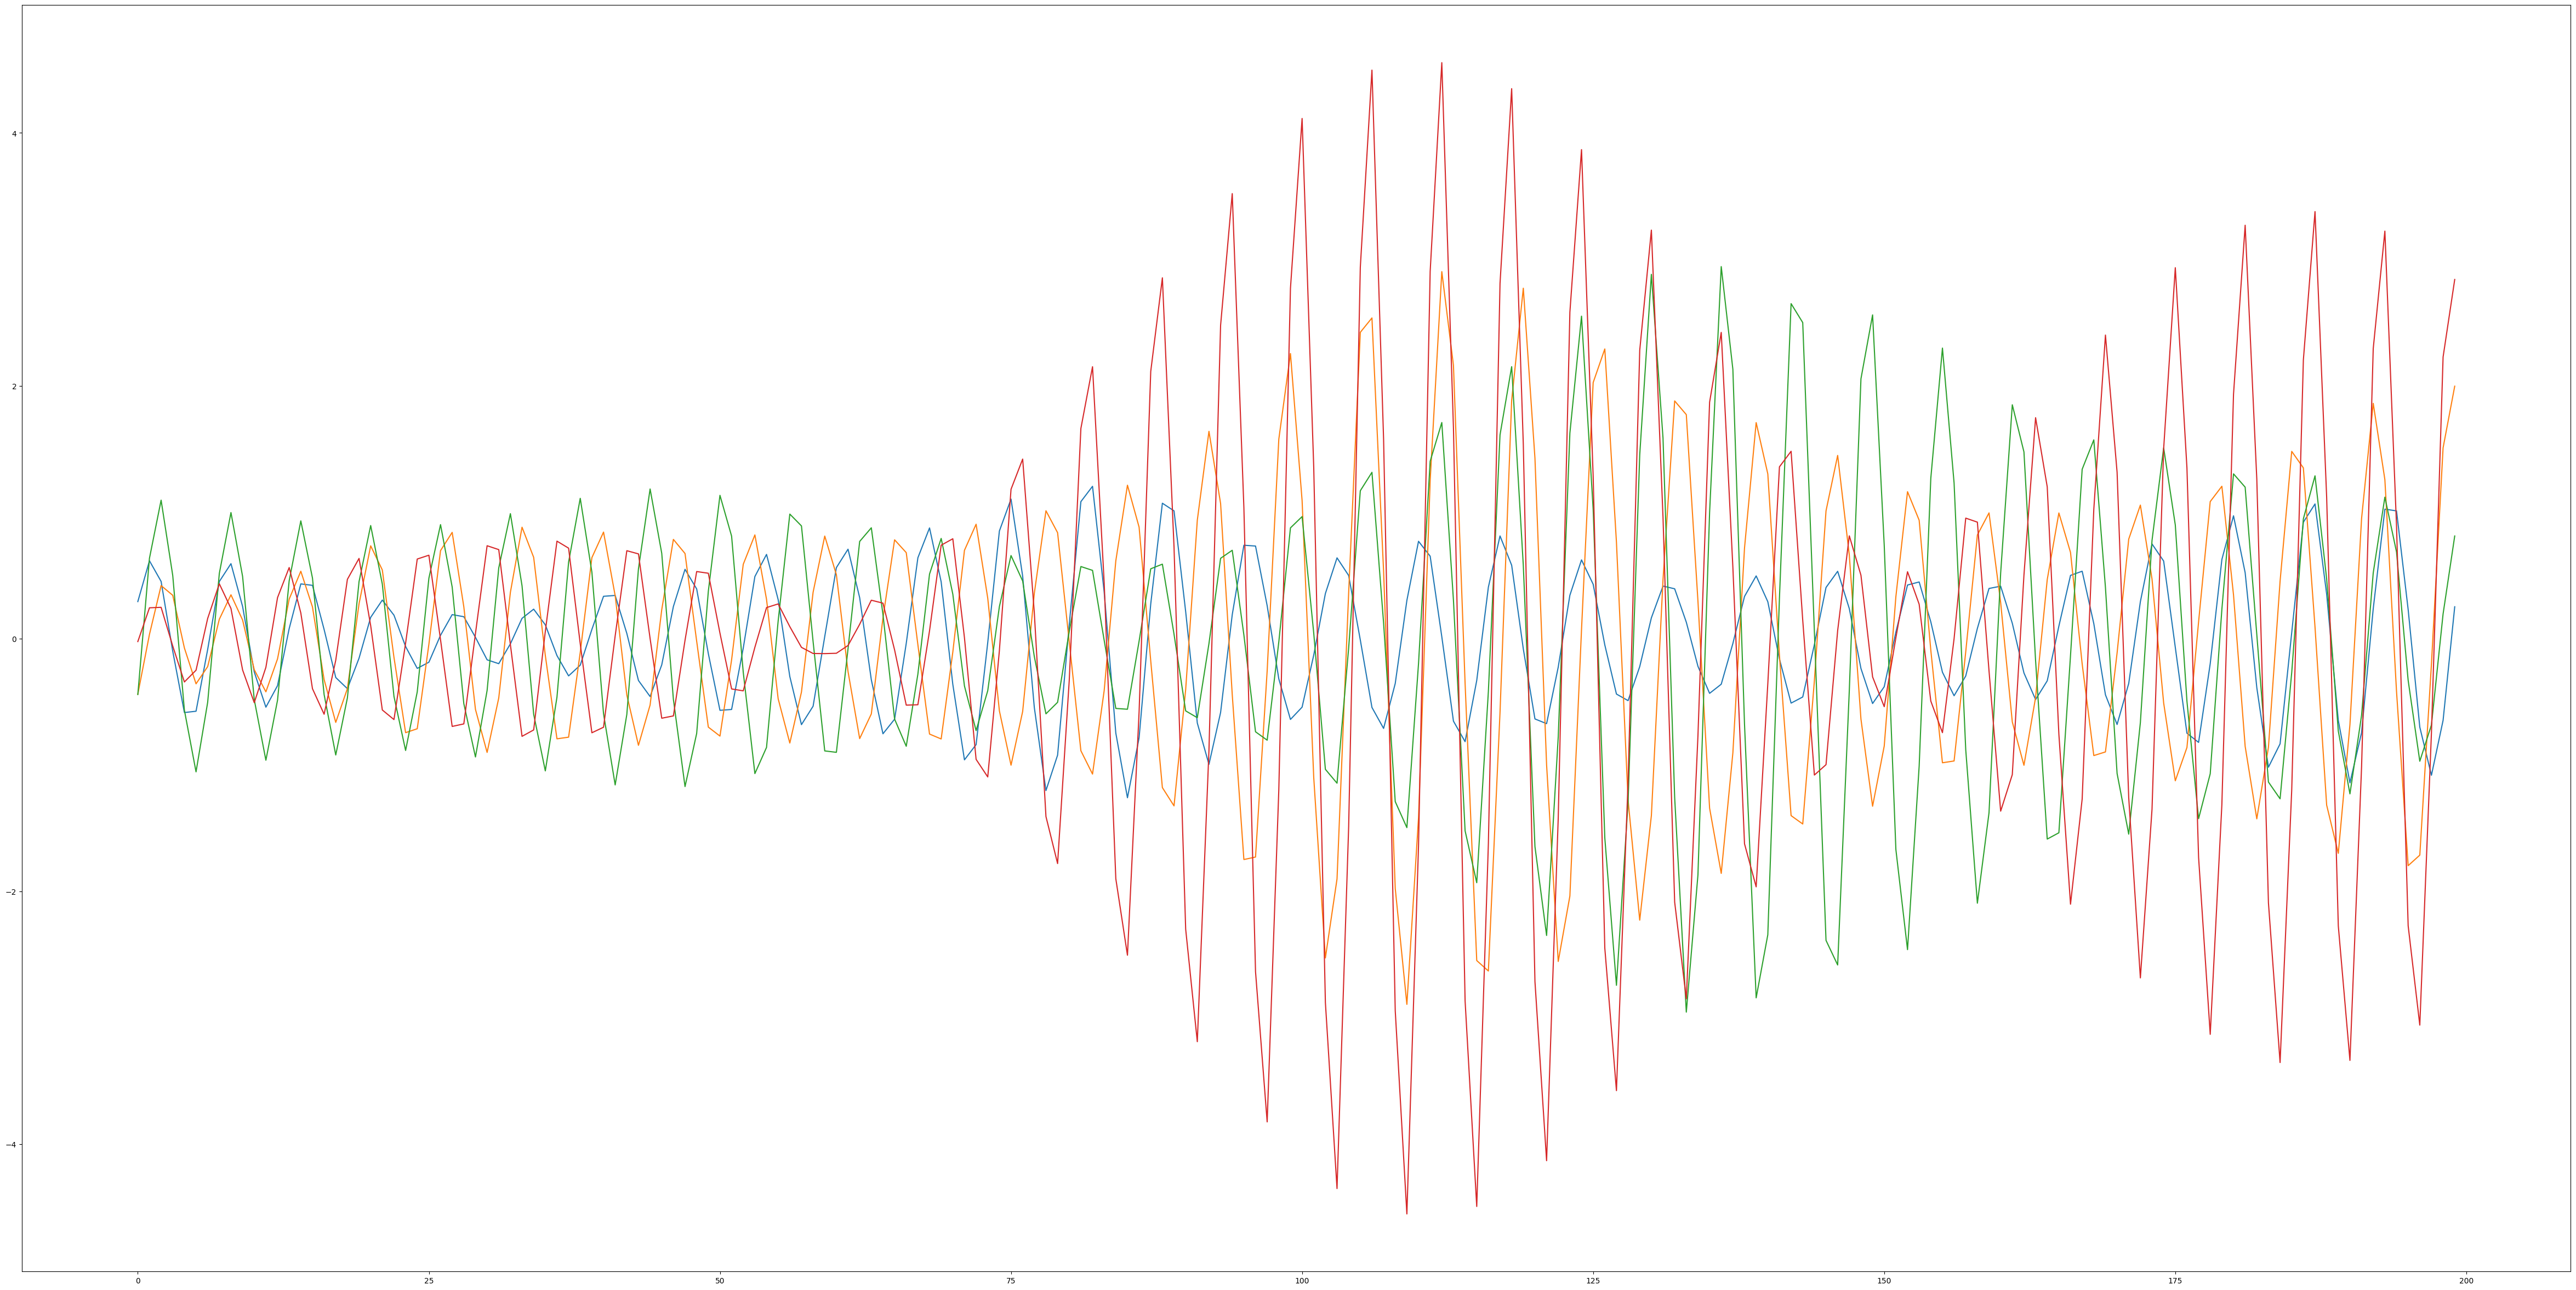

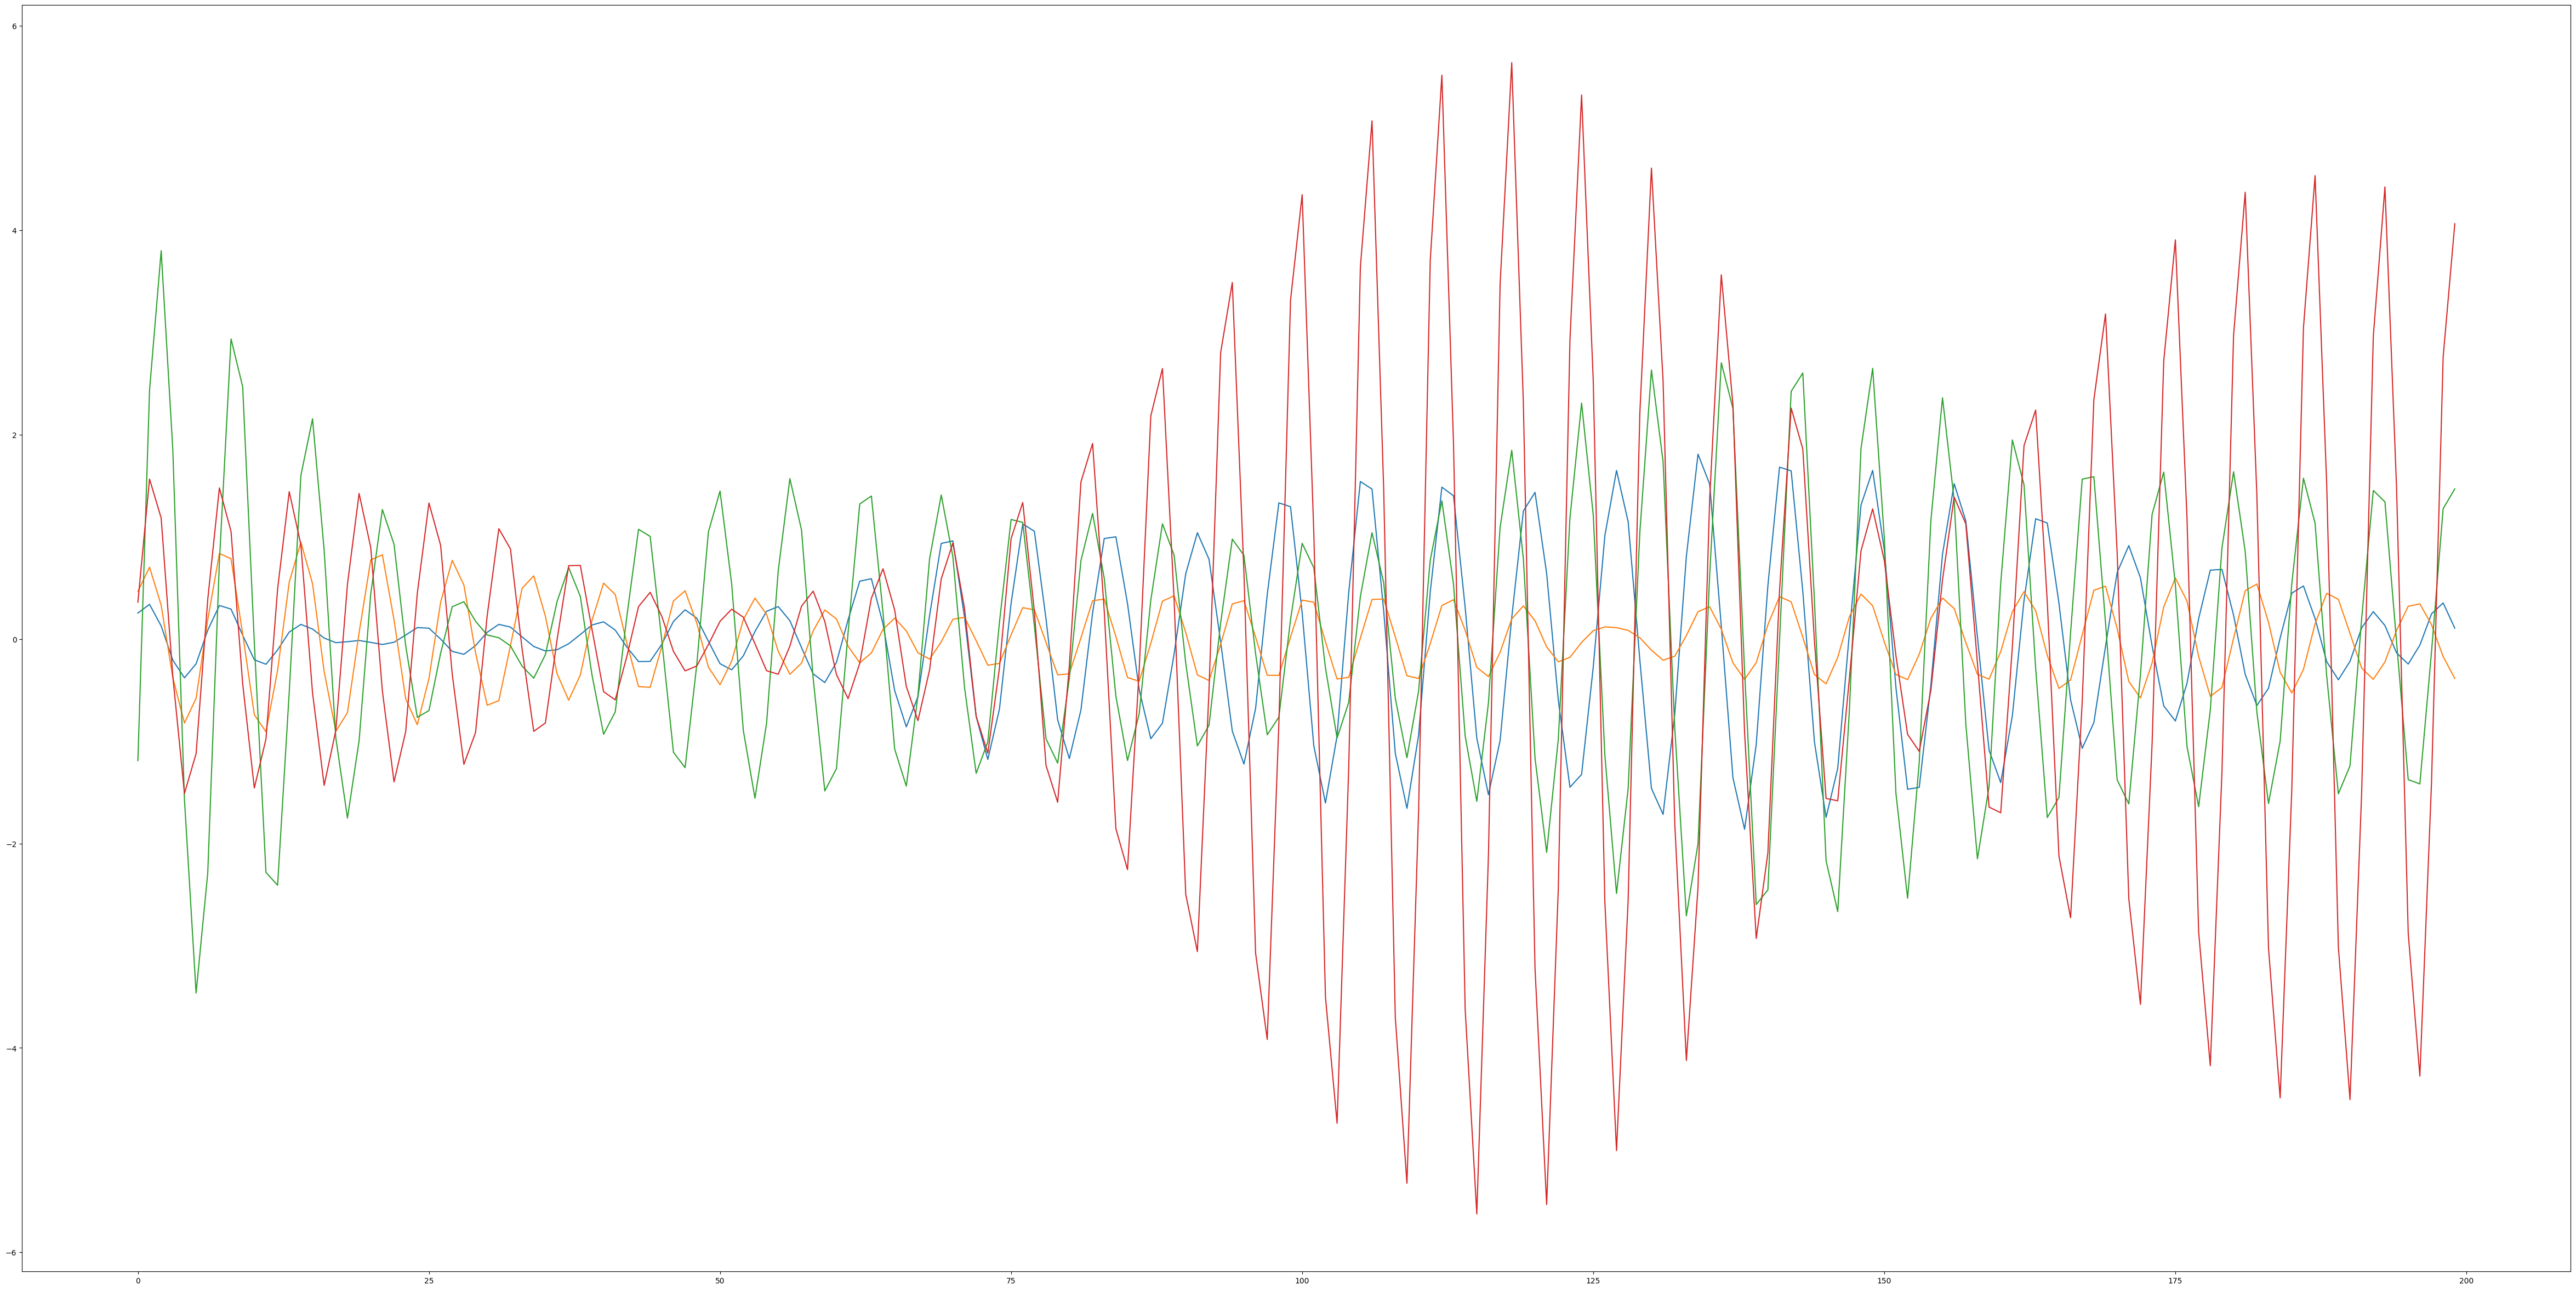

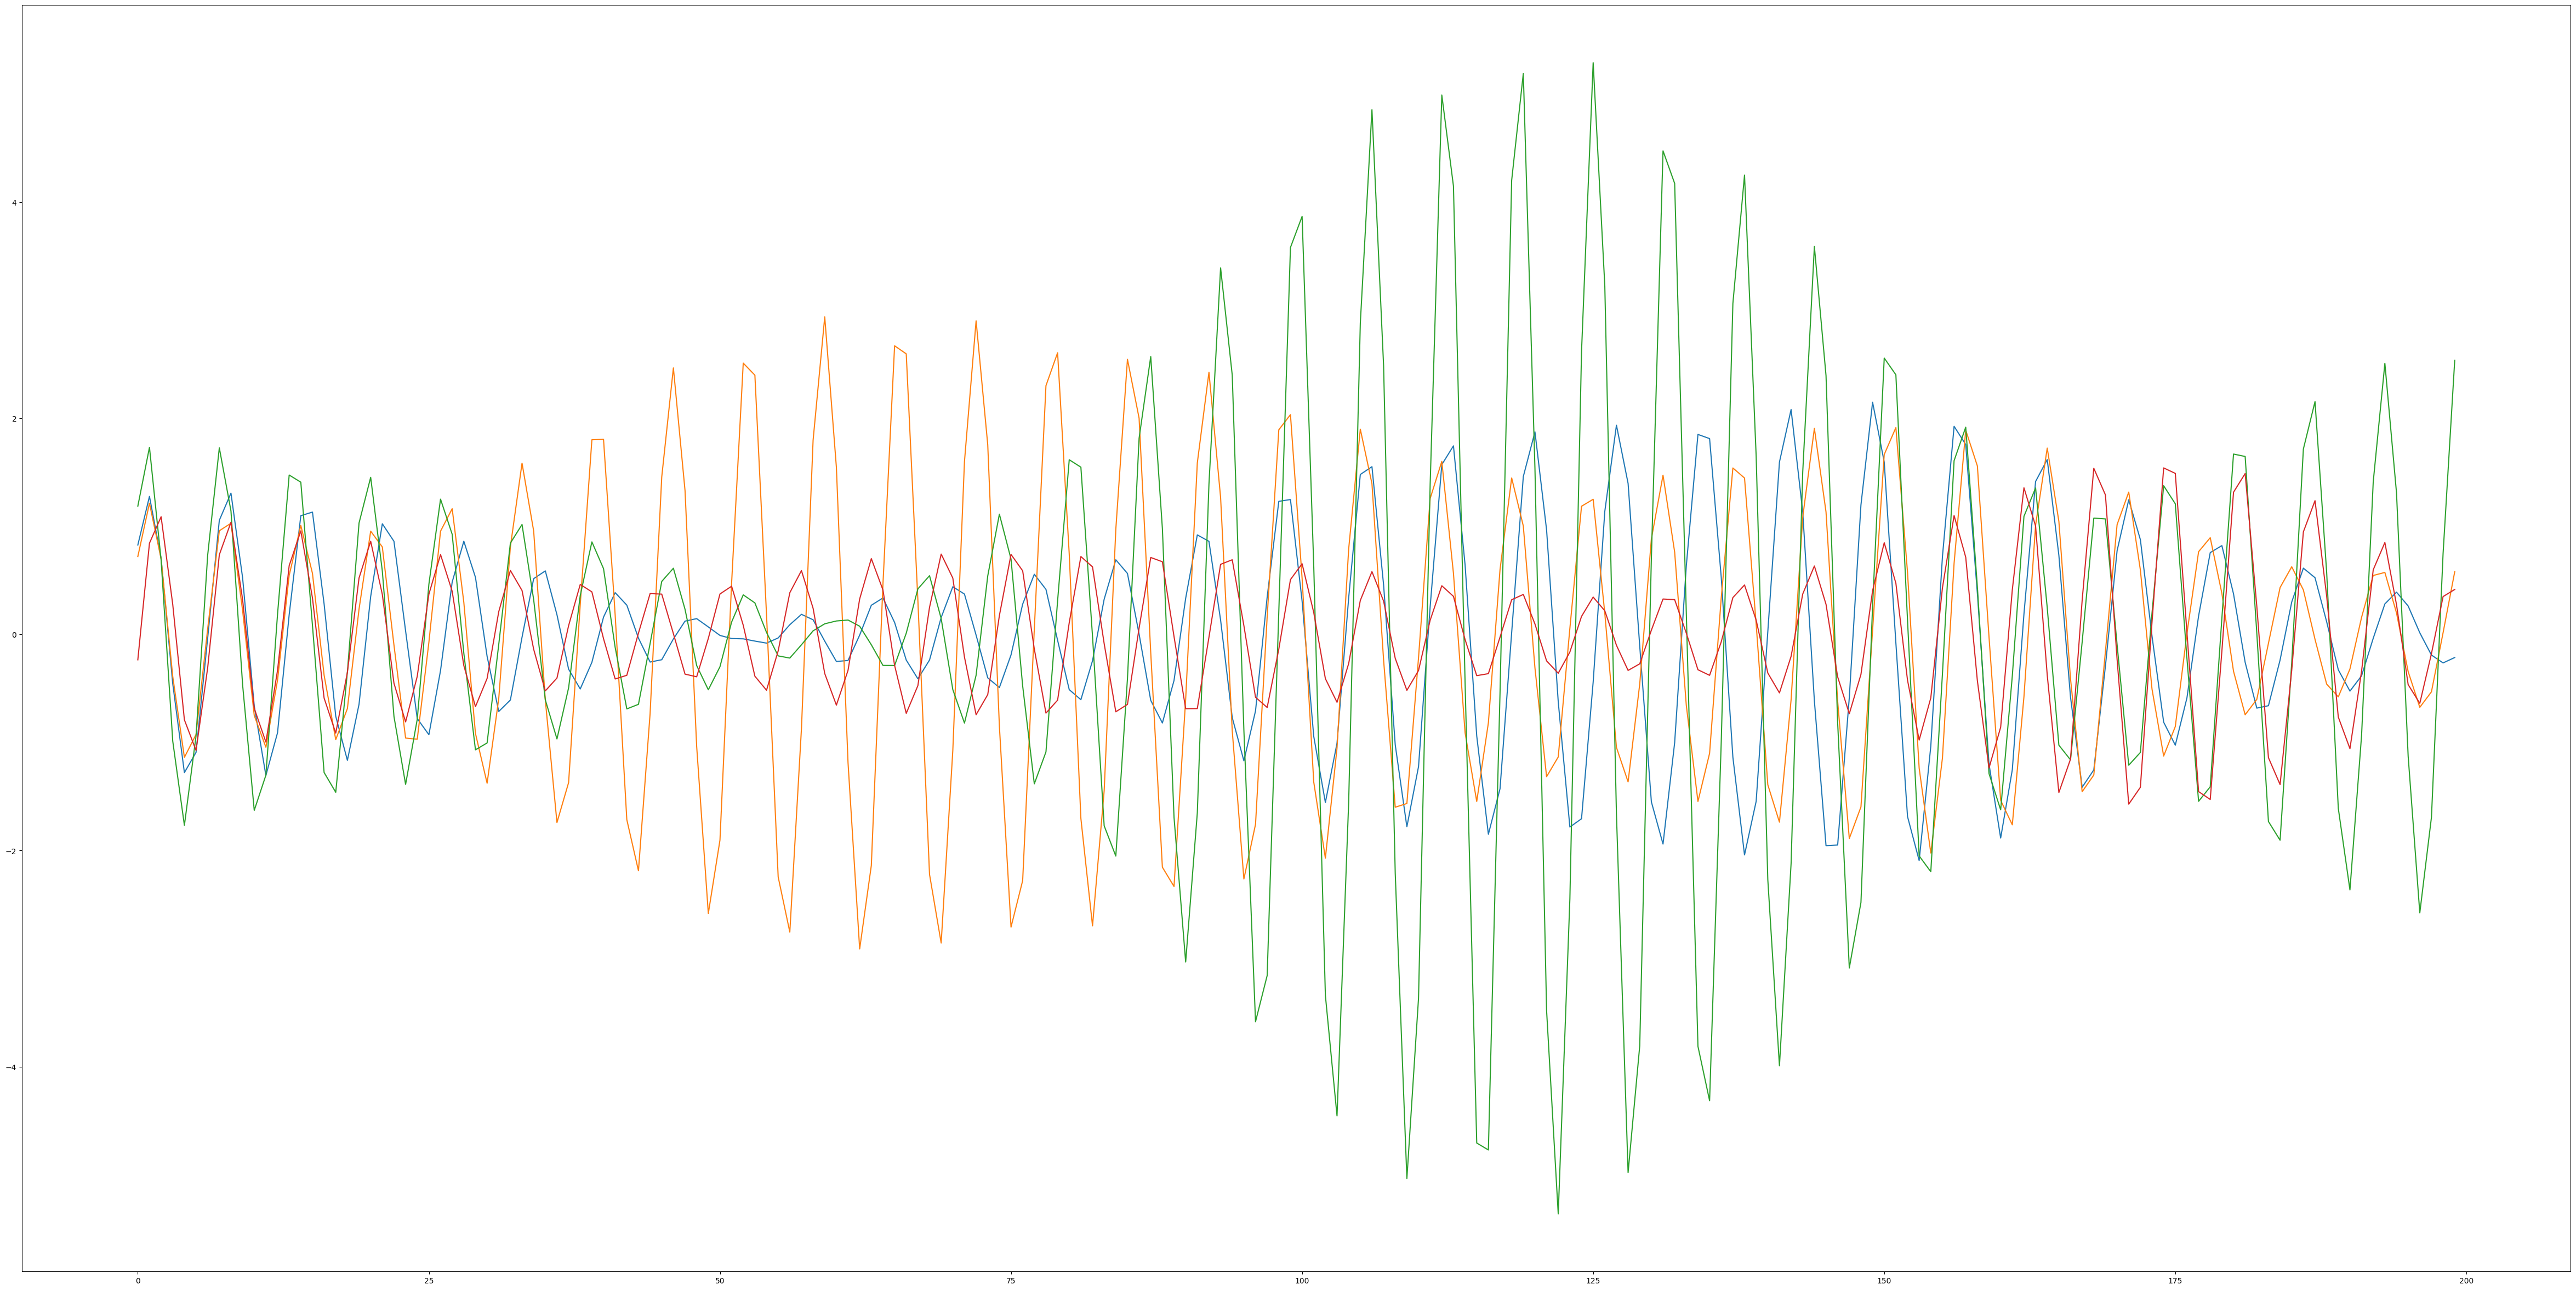

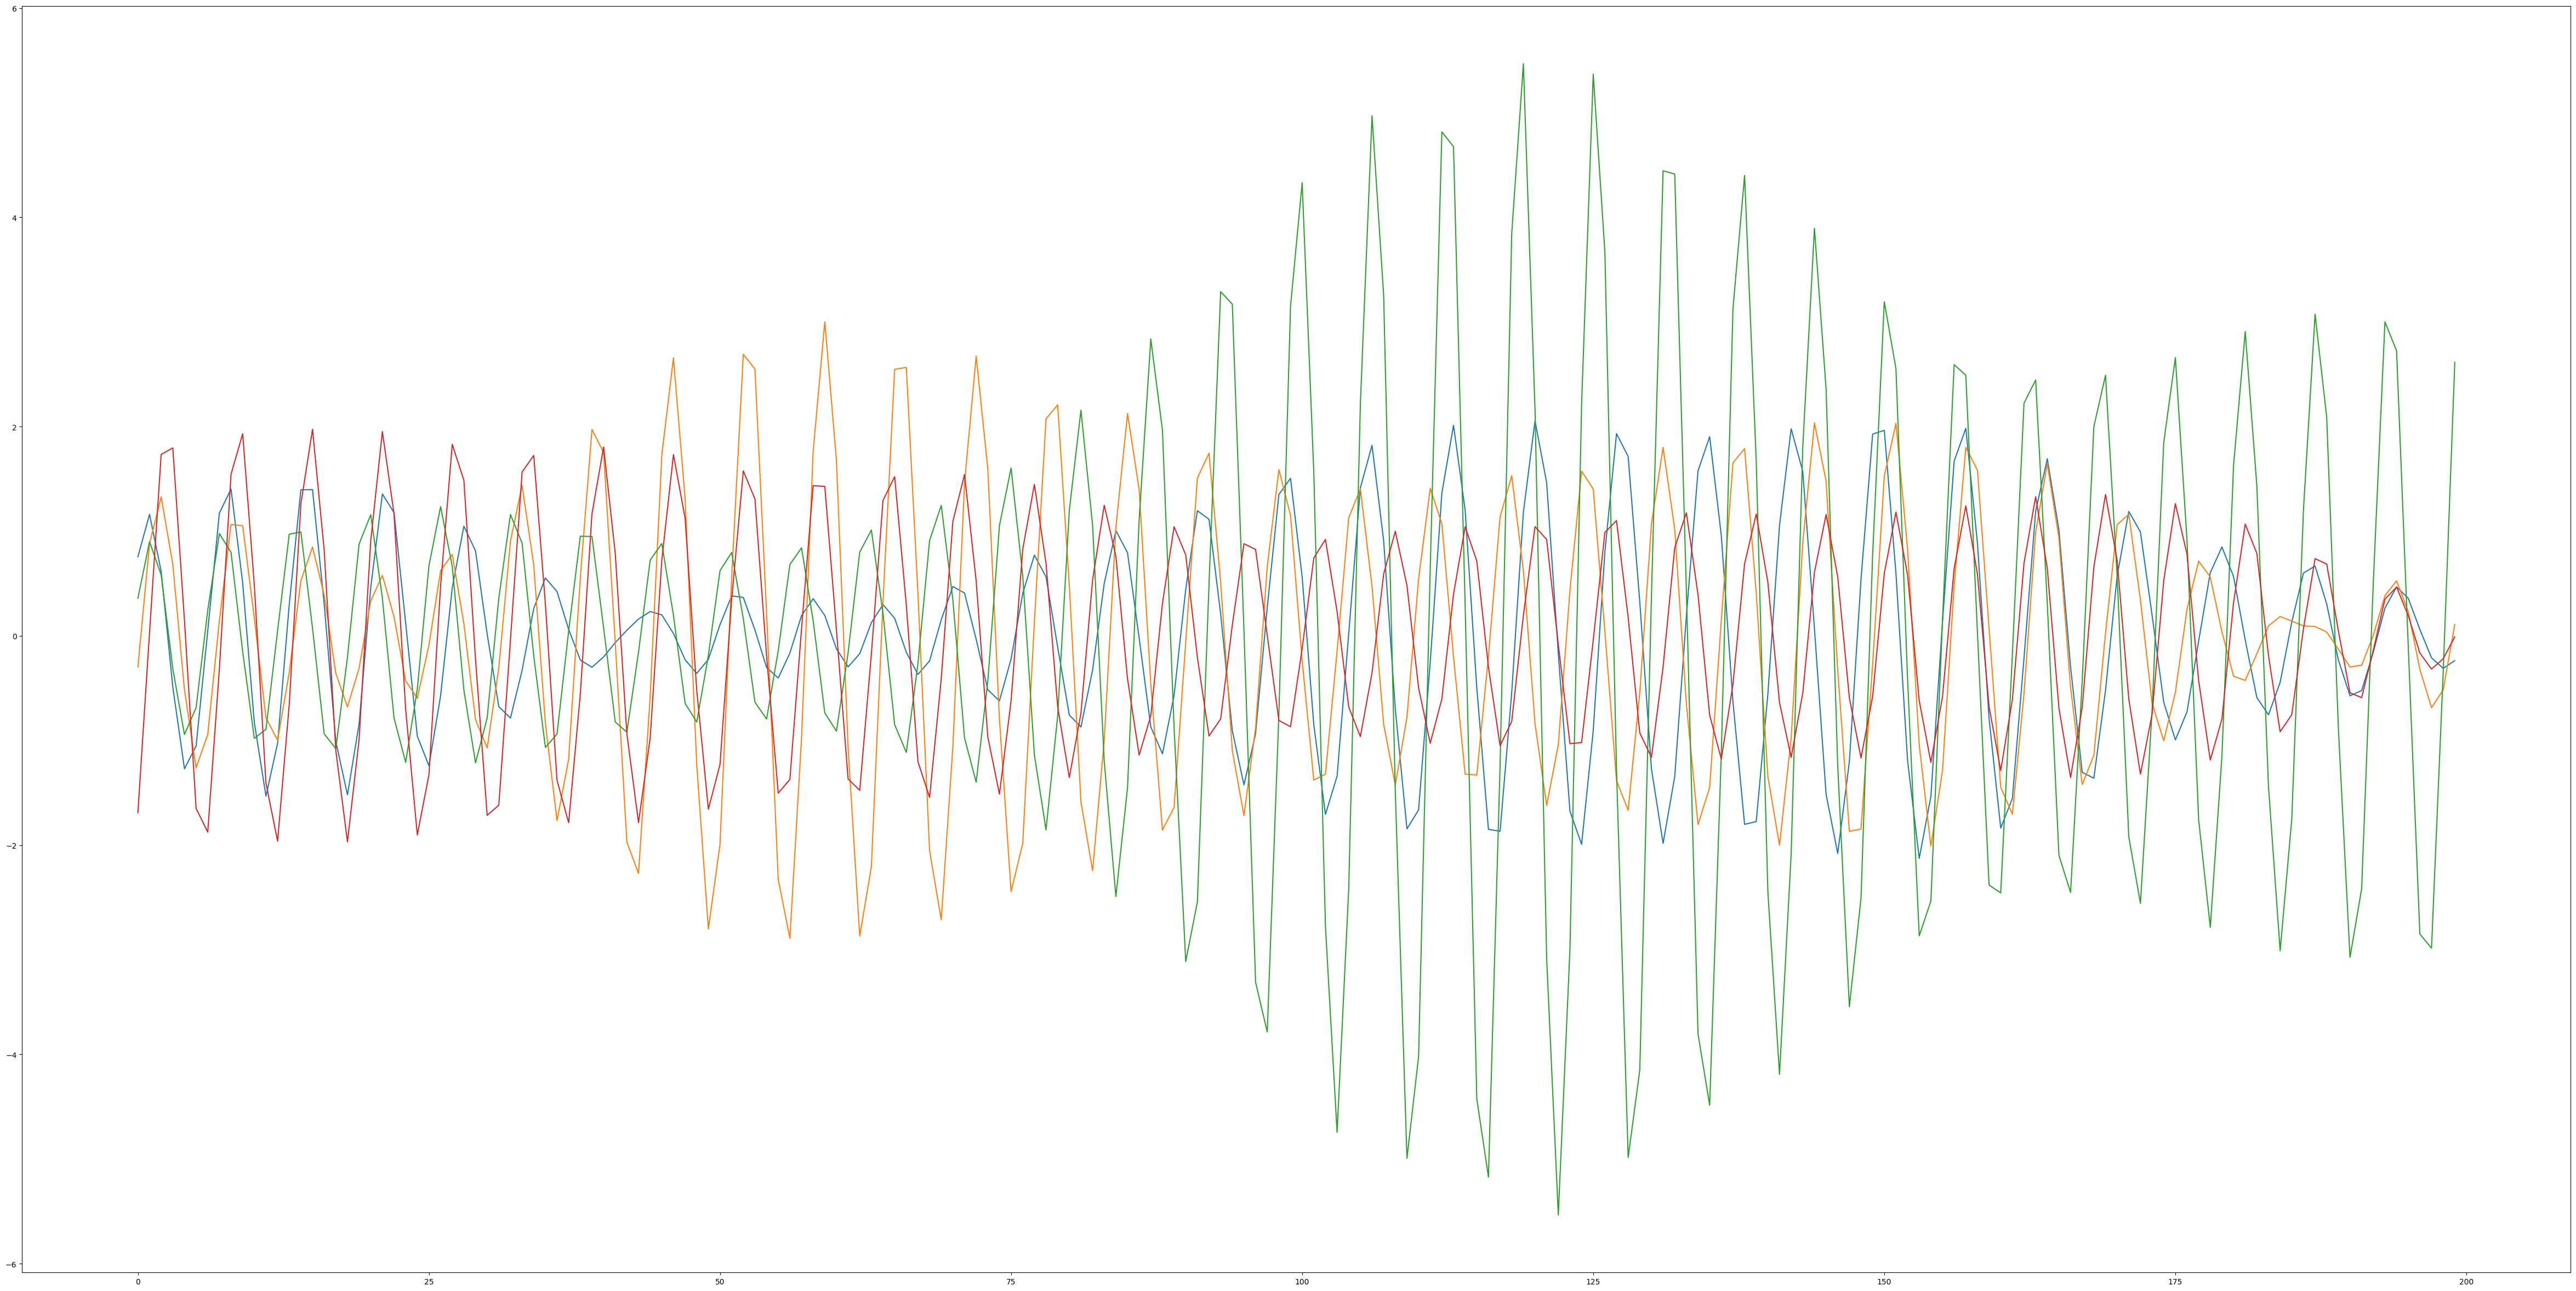

In [158]:
pos=points[0]+len(preamble)
print(pos)
chirp0 = chirp(6000,6500,400)
chirp1 = chirp(6500,7000,400)
chirp2 = chirp(7000,7500,400)
chirp3 = chirp(7500,8000,400)

res0 = []
res1 = []
res2 = []
res3 = []

for i in range(pos,pos+10000):
    dot_0 = dot(a[i:],chirp0)
    res0.append(dot_0)    
    dot_1 = dot(a[i:],chirp1)
    res1.append(dot_1)    
    dot_2 = dot(a[i:],chirp2)
    res2.append(dot_2)    
    dot_3 = dot(a[i:],chirp3)
    res3.append(dot_3)    

for i in range(4):
    plt.figure(figsize=(60,30))
    plt.plot(res0[500*i:500*i+200])
    plt.plot(res1[500*i:500*i+200])    
    plt.plot(res2[500*i:500*i+200])
    plt.plot(res3[500*i:500*i+200])    
    plt.show()

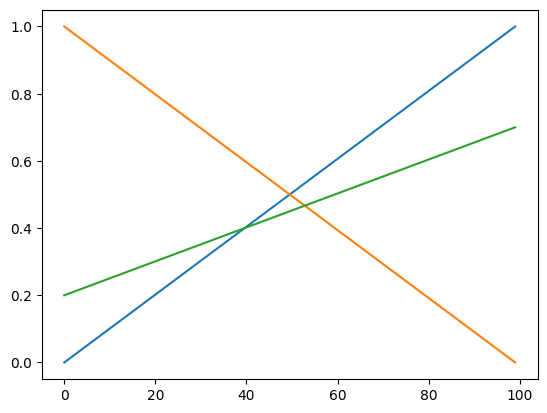

In [160]:
plt.plot(np.linspace(0,1,100))
plt.plot(np.linspace(1,0,100))
plt.plot(np.linspace(0.2,0.7,100))